In [64]:
import pandas as pd
import sys
sys.path.insert(0, "/home/apprenant/simplon_projects/house_price/")
from src.d00_utils.functions import columns_with_missing_values
import seaborn as sns
import numpy as np
from scipy import stats
from scipy.stats import uniform

from matplotlib import pyplot as plt

from sklearn import linear_model
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, make_scorer
from sklearn.svm import SVR



Importation de la donnée

In [30]:
df = pd.read_csv(r"/home/apprenant/simplon_projects/house_price/data/train.csv")

In [31]:
numeric_cols = df.select_dtypes(include=[ 'int64','float64' ])

In [32]:
categorical_cols = df.select_dtypes(include=[ 'object' ])

In [33]:
all_numeric = numeric_cols.join(pd.get_dummies(categorical_cols))

In [34]:
all_numeric = all_numeric.drop(columns=['SalePrice'])

In [35]:
all_numeric.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,0,0,1,0,0,0,0,1,0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,0,0,0,1,0,0,0,0,1,0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,0,0,1,0,0,0,0,1,0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,0,0,1,1,0,0,0,0,0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,0,0,0,1,0,0,0,0,1,0


In [36]:
all_numeric.isna().sum().sort_values()

Id                         0
BsmtFinType1_ALQ           0
BsmtExposure_No            0
BsmtExposure_Mn            0
BsmtExposure_Gd            0
                        ... 
Condition2_Feedr           0
SaleCondition_Partial      0
MasVnrArea                 8
GarageYrBlt               81
LotFrontage              259
Length: 289, dtype: int64

In [37]:
all_numeric = all_numeric.drop(columns=['MasVnrArea', 'GarageYrBlt', 'LotFrontage'])

Sélection des variables explicatives

In [39]:
y = df.SalePrice
X = all_numeric

In [40]:
def get_best_params(data, target, model, alphas):
    parameters = {'alpha': alphas, 'normalize': ('True', 'False')}
    clf = GridSearchCV(model, parameters, cv=5)
    clf.fit(data, target)
    return clf.best_estimator_

In [41]:
get_best_params(X, y, linear_model.Ridge(), [1, 10, 100])

Ridge(alpha=1, normalize='True')

In [42]:
parameters = {
    "alpha": uniform(loc=0, scale=1),
    'normalize': ('True', 'False')
}
model = linear_model.Ridge()

clf = RandomizedSearchCV(model, parameters, n_iter=50, cv=5, random_state=1)
clf.fit(X, y)
clf.best_estimator_


Ridge(alpha=0.5331652849730171, normalize='True')

In [43]:
parameters = {
    "alpha": uniform(loc=33, scale=35),
    'normalize': ('True', 'False')
}
model = linear_model.Lasso()

clf = RandomizedSearchCV(model, parameters, n_iter=50, cv=5, random_state=1)
clf.fit(X, y)
clf.best_estimator_

Lasso(alpha=34.36691741315088, normalize='False')

In [44]:
linear_model.Ridge().get_params()

{'alpha': 1.0,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': None,
 'normalize': False,
 'random_state': None,
 'solver': 'auto',
 'tol': 0.001}

In [45]:
get_best_params(X, y, linear_model.Ridge(), [0.1,0.2,0.3,0.4,0.5,0.6, 0.7,1,2])

Ridge(alpha=0.5, normalize='True')

In [46]:
get_best_params(X, y, linear_model.Lasso(), [33,34, 35])

Lasso(alpha=34, normalize='True')

In [47]:
results = pd.DataFrame(clf.cv_results_)

In [48]:
xtrain, xtest, ytrain, ytest = train_test_split(X, y, train_size=0.8)

In [49]:
def display_metrics(train, pred):
    print(f'R2 : {r2_score(train, pred)}')
    print(f'Root mean squared error : {mean_squared_error(train, pred, squared=False)}\n')

ridge_regr = linear_model.Ridge(alpha=0.5336533449712114, normalize=True)
ridge_regr.fit(xtrain, ytrain)
ytrainpred_ridge = ridge_regr.predict(xtrain)
ytestpred_ridge = ridge_regr.predict(xtest)

print('Train - Ridge')
display_metrics(ytrain, ytrainpred_ridge)
print('Test - Ridge')
display_metrics(ytest, ytestpred_ridge)


Train - Ridge
R2 : 0.9107071487760967
Root mean squared error : 23434.477089516422

Test - Ridge
R2 : 0.767185101836986
Root mean squared error : 40069.182642356034



In [50]:
ridge_regr = linear_model.Ridge(alpha=0.5336533449712114, normalize=False)
ridge_regr.fit(xtrain, ytrain)
ytrainpred_ridge = ridge_regr.predict(xtrain)
ytestpred_ridge = ridge_regr.predict(xtest)

print('Train - Ridge')
display_metrics(ytrain, ytrainpred_ridge)
print('Test - Ridge')
display_metrics(ytest, ytestpred_ridge)

Train - Ridge
R2 : 0.9284942169710175
Root mean squared error : 20970.921051232177

Test - Ridge
R2 : 0.70661351054759
Root mean squared error : 44980.590735288184



In [59]:
regr = linear_model.LinearRegression()

list = [xtrain, ytrain]

regr.fit(*list)

print("Régression linéaire")
print(f"Les coefficients de régression sont : {regr.coef_}")
print(f"L'ordonnée à l'origine est : {round(regr.intercept_)}\n")


ridge_regr = linear_model.Ridge(alpha=0.5, normalize=True)
ridge_regr.fit(*list)

print("Ridge")
print(f"Les coefficients de régression sont : {ridge_regr.coef_}")
print(f"L'ordonnée à l'origine est : {round(ridge_regr.intercept_)}\n")


lasso_regr = linear_model.Lasso(alpha=34, normalize=True)
lasso_regr.fit(*list)

print("Lasso")
print(f"Les coefficients de régression sont : {lasso_regr.coef_}")
print(f"L'ordonnée à l'origine est : {round(lasso_regr.intercept_)}\n")





Régression linéaire
Les coefficients de régression sont : [ 1.51739749e+00 -2.46899968e+01  8.17712350e-01  5.80802954e+03
  5.37083896e+03  2.60055364e+02  1.01496860e+02  1.36697248e+01
  6.14452254e+00  1.94122604e-01  2.00073022e+01  1.53946330e+01
  2.67557081e+01 -1.24393815e+01  2.97079904e+01  9.12726435e+02
  3.26585532e+03  5.19856938e+03  1.25015417e+03 -2.23506334e+03
 -2.01307536e+04  1.44066878e+03  5.24993684e+03  3.88881063e+03
  2.14811599e+01  1.71058130e+01  6.79897238e+00  1.22872866e+01
  2.67179613e+01  4.17809559e+01  6.33620059e+03  4.21091527e-01
 -4.27961711e+02 -8.19063840e+02 -2.43751806e+04  1.32144406e+04
  4.77416492e+03  4.77093811e+03  1.61563689e+03 -1.14705065e+04
  1.14705065e+04  2.25609082e+03  2.33646974e+03 -4.29437579e+03
 -5.52843183e+02  5.86217581e+03 -1.01495684e+03 -7.79228199e+02
  8.81271071e+03 -1.43580049e+04  6.32452240e+03  1.93653146e+04
 -1.93653146e+04  3.69705116e+03  1.18939112e+04 -2.82820387e+03
 -1.49172683e+04  2.15450980e+03

In [75]:
svr_regr = SVR(kernel='poly')
svr_regr.fit(*list)

print("SVR")

SVR


In [86]:
param_grid = {
    'kernel' : ['poly'],
    'degree' : [2, 3, 4]
}
scorers = {'R2': make_scorer(r2_score),
           'MSE': make_scorer(mean_squared_error)}

grid_search = GridSearchCV(svr_regr, param_grid, scoring=scorers, refit='MSE', cv=5)

grid_search.fit(xtrain, ytrain)

GridSearchCV(cv=5, estimator=SVR(kernel='poly'),
             param_grid={'degree': [2, 3, 4], 'kernel': ['poly']}, refit='MSE',
             scoring={'MSE': make_scorer(mean_squared_error),
                      'R2': make_scorer(r2_score)})

In [87]:
grid_search.best_estimator_

SVR(degree=4, kernel='poly')

In [89]:
grid_search.best_score_

9126854334.385975

In [90]:
grid_search.best_index_

2

In [88]:
grid_search.best_params_

{'degree': 4, 'kernel': 'poly'}

In [76]:
ytrainpred_linear = regr.predict(xtrain)
ytestpred_linear = regr.predict(xtest)
ytrainpred_ridge = ridge_regr.predict(xtrain)
ytestpred_ridge = ridge_regr.predict(xtest)
ytrainpred_lasso = lasso_regr.predict(xtrain)
ytestpred_lasso = lasso_regr.predict(xtest)

ytrainpred_svr = svr_regr.predict(xtrain)
ytestpred_svr = svr_regr.predict(xtest)

In [77]:
from sklearn.metrics import mean_absolute_error, mean_squared_error


def display_metrics(train, pred):
    print(f'R2 : {r2_score(train, pred)}')
    print(f'Root mean squared error : {mean_squared_error(train, pred, squared=False)}\n')


print('Train\n')

print('Train - Linear regression')
display_metrics(ytrain, ytrainpred_linear)

print('Train - Ridge')
display_metrics(ytrain, ytrainpred_ridge)

print('Train - Lasso')
display_metrics(ytrain, ytrainpred_lasso)

print('Train - SVR')
display_metrics(ytrain, ytrainpred_svr)

print('Test\n')

print('Test - Linear regression')
display_metrics(ytest, ytestpred_linear)

print('Test - Ridge')
display_metrics(ytest, ytestpred_ridge)

print('Test - Lasso')
display_metrics(ytest, ytestpred_lasso)

print('Test - SVR')
display_metrics(ytest, ytestpred_svr)


Train

Train - Linear regression
R2 : 0.93320380846608
Root mean squared error : 20268.554290024316

Train - Ridge
R2 : 0.9118946878791486
Root mean squared error : 23278.123550386477

Train - Lasso
R2 : 0.9094587551755606
Root mean squared error : 23597.725911406844

Train - SVR
R2 : -0.04285687551893913
Root mean squared error : 80086.49300218647

Test

Test - Linear regression
R2 : 0.017243957746443606
Root mean squared error : 82324.28373884011

Test - Ridge
R2 : 0.7660921698083716
Root mean squared error : 40163.123404069134

Test - Lasso
R2 : 0.7561375695077087
Root mean squared error : 41008.846016644304

Test - SVR
R2 : -0.3551934125009921
Root mean squared error : 96673.12118943247



<AxesSubplot:xlabel='SalePrice'>

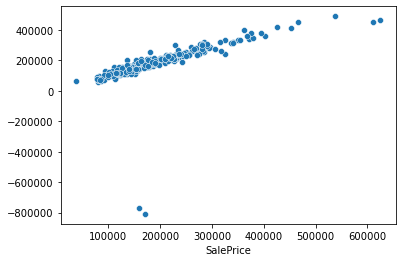

In [54]:
sns.scatterplot(x=ytest, y=ytestpred_linear)

<AxesSubplot:xlabel='SalePrice'>

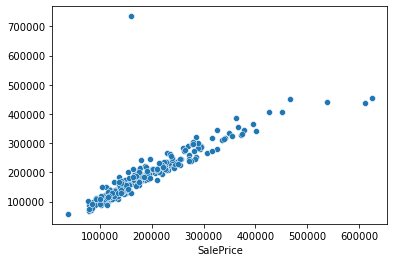

In [55]:
sns.scatterplot(x=ytest, y=ytestpred_lasso)

<AxesSubplot:xlabel='SalePrice'>

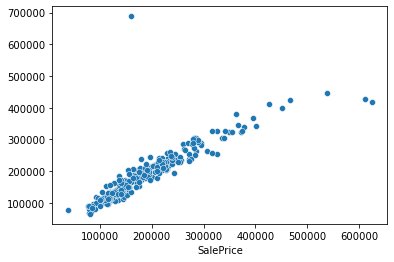

In [56]:
sns.scatterplot(x=ytest, y=ytestpred_ridge)

<AxesSubplot:xlabel='SalePrice'>

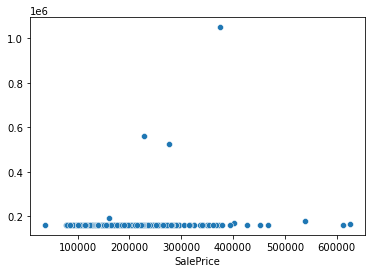

In [78]:
sns.scatterplot(x=ytest, y=ytestpred_svr)